<a href="https://colab.research.google.com/github/Gruppe3VDL/Gruppe3VDLws2019/blob/master/exercise1/exercise_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise Sheet 1



### Read the Dataset

- Use Pandas to read the 'covertype.csv' file
- The dataset contains information on different forest cover types
- Look at the columns. Which of them contain meaningful features?



### Seperate Features and Labels
- Define x as the vectors of meaningful features
- Define y as the labels (Cover_Type)



### Split the dataset into two disjoint datasets for training and testing
- Randomly split the dataset. Use 70% for training and 30% for testing.
- Define x_train and x_test as the feature vectors
- Define y_train and y_test as the labels
    - Hint: Have a look at the sklearn package

In [100]:
import pandas as pd

from sklearn.model_selection import train_test_split

# Load the dataset
url = 'https://raw.githubusercontent.com/Gruppe3VDL/Gruppe3VDLws2019/master/exercise1/covertype.csv'
df = pd.read_csv(url)

# Drop meaningless columns (i.e. the ID column, plus all non-unique columns)
df = df.drop('Id', 1)
categorical_df = df[df.columns[10:54]]
for coloumn in categorical_df:
  if df[coloumn].nunique() <=1:
        del df[coloumn]

# Separate Features and Labels
x = df[df.columns[:52]]  # the vector of meaningful features
y = df.iloc[:,52]        # the labels (Cover_Type)
cover_type = pd.Series(y)
frame = {'Cover_Type': cover_type}
y = pd.DataFrame(frame)

# Split the dataset into two disjoint datasets for training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)
x_train = pd.DataFrame(x_train, columns = x.columns)
x_test = pd.DataFrame(x_test, columns = x.columns)
display(y_train)

,Cover_Type
1648,5
1767,2
14822,1
6588,7
994,1
...,...
2250,3
12296,3
7613,5
3792,4


### Train a simple deep neural network
- Use Pytorch to define a simple Multi-Layer Perceptron with at least 3 layers
    - The input layer should have as many neurons as there are features
        - How many features are there?
    - The last layer should have as many neurons as there are classes
        - How many classes are there?
- Pack your training and testing datasets in a class which inherits from torch.utils.data.Datset
    - features you input to your network should be of type torch.float
    - labels should be of type torch.long.
- Use a torch.utils.data.DataLoader to access your data in batches
- Train the MLP with your data from the train_loader using Cross-Entropy Loss and the Adam Optimizer
    - Make sure to save the training history for later assessment
- Evaluate the performance on your test_loader

In [101]:
import numpy as np
import torch

from torch.utils.data import Dataset, DataLoader


# Find out the size of feature vector and number of classes
features = x.shape[1]
labels = np.unique(y).shape[0]
print("# of features:", features)  # 52
print("# of labels:", labels)     # 7

# Define a simple MLP
class MyCustomDataset(Dataset):
    # input: 52 neurons (there are 52 features)
    # output: 7 neurons (there are 7 classes i.e. unique Cover_Type)
    def __init__(self, x_train, y_train):
        self.x_train = torch.from_numpy(np.asarray(x_train)).float()
        self.y_train = torch.from_numpy(np.asarray(y_train)).long()

    def __getitem__(self, index):
        data = self.x_train[index]
        label = self.y_train[index] # Some data read from a file or image
        return (data, label)

    def __len__(self): # Check
        return (self.x_train.shape[0])


# Create your DataLoaders
custom_dataset = MyCustomDataset(x_train, y_train)
train_loader = DataLoader(dataset=custom_dataset)

# of features: 52
# of labels: 7


In [0]:
# Instantiate the network, the optimizer and the Loss Criterion
import torch.nn 
import torch.nn.functional as F


class ThreeLayerNet(torch.nn.Module):
  def __init__(self, D_in, H, D_out):
    """
    In the constructor we instantiate two nn.Linear modules and assign them as
    member variables.
    
    D_in: input dimension
    H: dimension of hidden layer
    D_out: output dimension
    """
    super(ThreeLayerNet, self).__init__()
    self.hidden1 = torch.nn.Linear(D_in, H)
    self.hidden2 = torch.nn.Linear(H, H)
    self.hidden3 = torch.nn.Linear(H, D_out)
  
  def forward(self, x):
    """
    In the forward function we accept a Variable of input data and we must 
    return a Variable of output data. We can use Modules defined in the 
    constructor as well as arbitrary operators on Variables.
    """
    sigmoid = torch.nn.Sigmoid()
    x = sigmoid(self.hidden1(x)) # hidden layer 1, followed by sigmoid activation

    lrelu = torch.nn.LeakyReLU()
    x = lrelu(self.hidden2(x)) # hidden layer 2, followed by leaky ReLU activation

    softmax = torch.nn.Softmax(dim=1)
    x = softmax(self.hidden3(x)) # hidden layer 3, followed by softmax
    return x

# (no of inputs + no of outputs)^0.5 + (1 to 10)
N, D_in, H, D_out = 64, 52, 32, 7
criterion = torch.nn.CrossEntropyLoss()

# Construct our model by instantiating the class defined above
net = ThreeLayerNet(D_in, H, D_out)
optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)

In [0]:
# Define your training Loop
def train_epoch(model, dataloader, criterion, optimizer):
    model.train()
    epoch_loss = 0
    correct = 0.
    samples = 0.
   
    for data, label in dataloader:
        optimizer.zero_grad()
        prediction = model(data)
        label = label.view(-1)
        loss = criterion(prediction, label)
        correct += sum(torch.argmax(prediction, dim=1) == label)
        samples += len(data)
        epoch_loss += loss.data
        loss.backward()
        optimizer.step()

    return epoch_loss, correct/samples


# Define your testing Loop
def test_epoch(model, dataloader, criterion):
    model.eval()
    epoch_loss = 0
    correct = 0.
    samples = 0.
    for data, label in dataloader:
        prediction = model(data)
        label = label.view(-1)
        loss = criterion(prediction, label)
        correct += sum(torch.argmax(prediction, dim=1) == label)
        samples += len(data)
        epoch_loss += loss.data

    return epoch_loss, correct/samples

In [104]:
# Check if your training and testing loops are working
train_epoch(net, train_loader, criterion, optimizer)
test_epoch(net, test_loader, criterion)


RuntimeError: ignored

### Debug
- If there is a RuntimeError raised in you loss function, either your network architecture or your data is faulty
    - Check your network architecture
    - Check your data
        - Are there any NaN or infinite features or labels?
    - Print the labels.
        - How many unique labels do you have?
        - Are they [0, ..., n-1]?
            - If not, align them

In [105]:
# Inspect your data
import numpy as np


# Check for NaN/infinte values in features and labels
print("error in features:", True in np.unique(np.isnan(x)) or True in np.unique(np.isinf(x)))
print("error in labels:", True in np.unique(np.isnan(y)) or True in np.unique(np.isinf(y)))

# Check the labels
labels = np.unique(y)

print(len(labels), "labels", labels)
if labels[0] is not 0:
  print("labels not zero-aligned. FIX THIS!!!")

error in features: False
error in labels: False
7 labels [1 2 3 4 5 6 7]
labels not zero-aligned. FIX THIS!!!


In [106]:
# Fix your data and recreate your DataLoaders
print("initial labels")
print(np.unique(y_train))
print(np.unique(y_test))

print("zero-aligning labels...")
y_train_aligned = y_train - 1
y_test_aligned = y_test - 1

print ("updated labels")
print(np.unique(y_train_aligned))
print(np.unique(y_test_aligned))

# recreate DataLoaders
train_dataset = MyCustomDataset(x_train, y_train_aligned)
train_loader = DataLoader(dataset=train_dataset)

test_dataset = MyCustomDataset(x_test, y_test_aligned)
test_loader = DataLoader(dataset=test_dataset)

# (no of inputs + no of outputs)^0.5 + (1 to 10)
N, D_in, H, D_out = 64, 52, 32, 7
criterion = torch.nn.CrossEntropyLoss()

initial labels
[1 2 3 4 5 6 7]
[1 2 3 4 5 6 7]
zero-aligning labels...
updated labels
[0 1 2 3 4 5 6]
[0 1 2 3 4 5 6]


### Train your Network
- Reinitialize your MLP from above and train it for 100 epochs

In [107]:
import tqdm


net = ThreeLayerNet(D_in, H, D_out)
optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)

train_loss, train_accuracy = [], []
test_loss, test_accuracy = [], []

for i in tqdm.tnrange(100):
    loss, accuracy = train_epoch(net, train_loader, criterion, optimizer)
    train_loss.append(loss)
    train_accuracy.append(accuracy)
    loss, accuracy = test_epoch(net, test_loader, criterion)
    test_loss.append(loss)
    test_accuracy.append(accuracy)

### Does it work?
- There should not be a RuntimeError raised now
- Does the network converge / Does the loss decrease?


### Visualize the training
- use matplotlib.pyplot to visualize the history
- plot both the training accuracy and the validation accuracy
- Does the training stagnate?

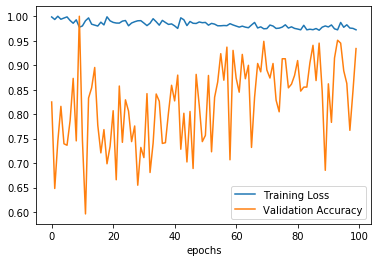

Training Accuracy: 27.75%
Validation Accuracy: 27.73%


In [108]:
import matplotlib.pyplot as plt


# Plot changes in loss over epochs
plt.plot(train_loss / np.max(train_loss), label='Training Loss')
plt.plot(test_accuracy / np.max(test_accuracy), label='Validation Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

# Print final test and validation accuracy
print("Training Accuracy: %.2f" % round(np.asarray(train_accuracy[-1]) * 100, 2) + "%")
print("Validation Accuracy: %.2f" % round(np.asarray(test_accuracy[-1]) * 100, 2) + "%")

### Inspect the data
- Compute the min, max, mean and standard deviation of each feature
- What data type do the columns have?
- Use Pandas to print the statistics in a table
- What could be problematic with the dataset?

In [109]:
import numpy as np
pd.options.display.float_format = '{:.2f}'.format

stats = pd.DataFrame(columns=[])

# Compute the values for each column
stats.insert(0, 'STD', df.std(axis = 0, skipna = True))
stats.insert(1, 'Min', df.min(axis = 0, skipna = True))
stats.insert(2, 'Max', df.max(axis = 0, skipna = True))
stats.insert(3, 'Mean', df.mean(axis = 0, skipna = True))

display(stats)

,STD,Min,Max,Mean
Elevation,417.68,1863,3849,2749.32
Aspect,110.09,0,360,156.68
Slope,8.45,0,52,16.50
Horizontal_Distance_To_Hydrology,210.08,0,1343,227.20
Vertical_Distance_To_Hydrology,61.24,-146,554,51.08
Horizontal_Distance_To_Roadways,1325.07,0,6890,1714.02
Hillshade_9am,30.56,0,254,212.70
Hillshade_Noon,22.80,99,254,218.97
Hillshade_3pm,45.90,0,248,135.09
Horizontal_Distance_To_Fire_Points,1099.94,0,6993,1511.15


### Preprocess the Data
- Normalize or standardize your data, so all features are at the same scale.
    - This will help your network to use all available features and not be biased by some features with large values
    - Does it make sense to normalize all columns, or only some?
- Hint: Again, look if you find something useful in sklearn


- Never use test data to optimize your training! This includes the preprocessing
    - Find preprocessing parameters on your training data only!
    - Transform all your data with the computed parameters
    - You have to remember which of your samples are used for training and which are for testing


In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train_scaled = sc.fit_transform(x_train)
x_test_scaled = sc.transform(x_test)

### Inspect data again
- Print the statistics of the preprocessed data using the code from above

In [111]:
pd.options.display.float_format = '{:.2f}'.format
stats = pd.DataFrame(columns=[])

# Compute the values for each column
# stats.insert(0, 'STD', new_df.std(axis = 0))
# stats.insert(1, 'Min', new_df.min(axis = 0))
# stats.insert(2, 'Max', new_df.max(axis = 0))
# stats.insert(3, 'Mean', new_df.mean(axis = 0))

display(stats)

""


### Train the network again
- Recreate your DataLoaders with the normalized data
- Reinitialize or your MLP from above and train it again


In [0]:
# Recreate your DataLoaders with the normalized data
train_dataset = MyCustomDataset(x_train_scaled, y_train_aligned)
train_loader = DataLoader(dataset=train_dataset)

test_dataset = MyCustomDataset(x_test_scaled, y_test_aligned)
test_loader = DataLoader(dataset=test_dataset)

In [114]:
import tqdm


net = ThreeLayerNet(D_in, H, D_out)
optimizer = torch.optim.Adam(net.parameters(), lr = 0.001)

train_loss, train_accuracy = [], []
test_loss, test_accuracy = [], []

for i in tqdm.tnrange(100):
    loss, accuracy = train_epoch(net, train_loader, criterion, optimizer)
    train_loss.append(loss)
    train_accuracy.append(accuracy)
    loss, accuracy = test_epoch(net, test_loader, criterion)
    test_loss.append(loss)
    test_accuracy.append(accuracy)

### Visualize the training
- use matplotlib.pyplot to visualize the history
- plot both the training accuracy and the validation accuracy

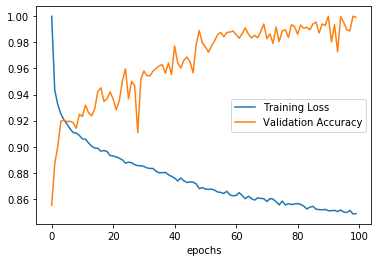

Training Accuracy: 83.01%
Validation Accuracy: 78.28%


In [115]:
import matplotlib.pyplot as plt


# Plot changes in loss over epochs
plt.plot(train_loss / np.max(train_loss), label='Training Loss')
plt.plot(test_accuracy / np.max(test_accuracy), label='Validation Accuracy')
plt.xlabel('epochs')
plt.legend()
plt.show()

# Print final test and validation accuracy
print("Training Accuracy: %.2f" % round(np.asarray(train_accuracy[-1]) * 100, 2) + "%")
print("Validation Accuracy: %.2f" % round(np.asarray(test_accuracy[-1]) * 100, 2) + "%")